In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from skimage import io

data1=sio.loadmat('ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [2]:
X=data1['X']
X.shape

(300, 2)

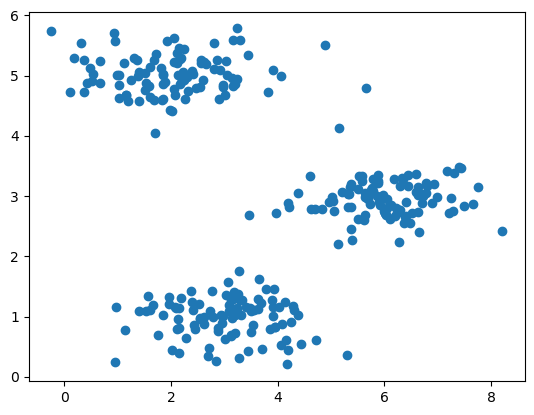

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
def find_centroids(X,centros):
    idx=[]

    for i in range(len(X)):

        dist=np.linalg.norm((X[i]-centros),axis=1)
        # print(dist)
        id_i=np.argmin(dist)
        idx.append(id_i)
    
    return np.array(idx)

In [5]:
centros=np.array([[3,3],[6,2],[8,5]])
idx=find_centroids(X,centros)
# print(idx)
idx[:3]

array([0, 2, 1], dtype=int64)

In [6]:
def computer_centros(X,idx,k):

    centros=[]
    for i in range(k):
        centros_i=np.mean(X[idx==i],axis=0)
        centros.append(centros_i)

    return np.array(centros)

In [7]:
computer_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [8]:
def run_kmeans(X,centros,iters):

    k=len(centros)
    centros_all=[]
    centros_all.append(centros)
    centros_i=centros

    for i in range(iters):
        idx=find_centroids(X,centros_i)
        centros_i=computer_centros(X,idx,k)
        centros_all.append(centros_i)

    return idx,np.array(centros_all)

In [9]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

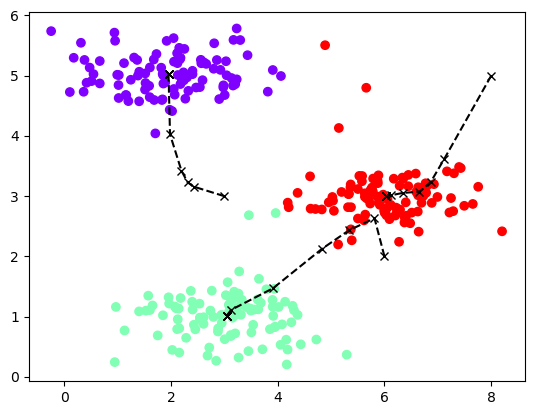

In [10]:
idx,centros_all=run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

In [11]:
def init_centros(X,k):
    index=np.random.choice(len(X),k)
    return X[index]

In [12]:
init_centros(X,k=3)

array([[2.16979227, 5.27435354],
       [2.79588724, 0.99526664],
       [0.54845223, 5.0267298 ]])

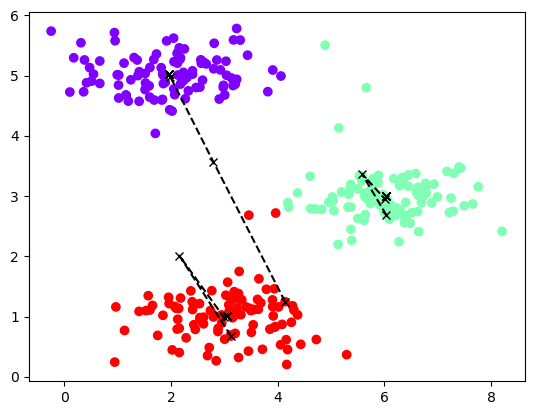

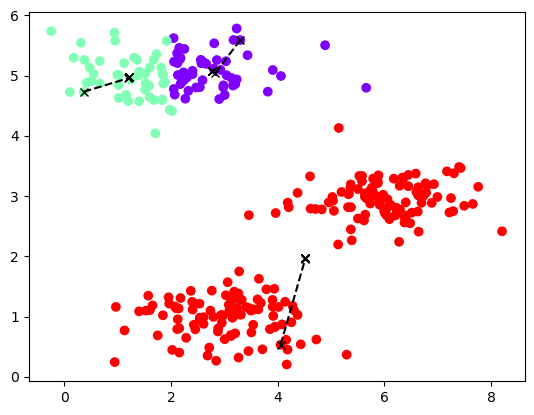

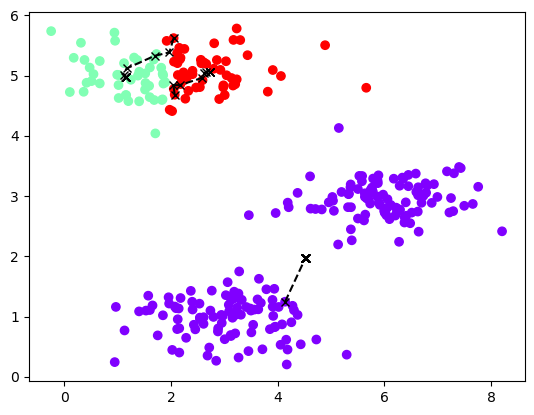

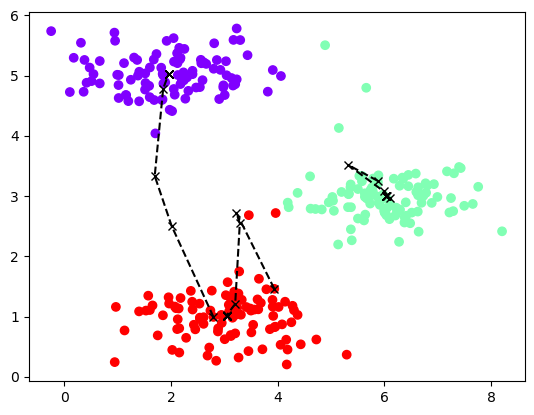

In [20]:
for i in range(4):
    idx,centros_all=run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)

In [14]:
data=sio.loadmat('bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [15]:
A=data['A']
A.shape

(128, 128, 3)

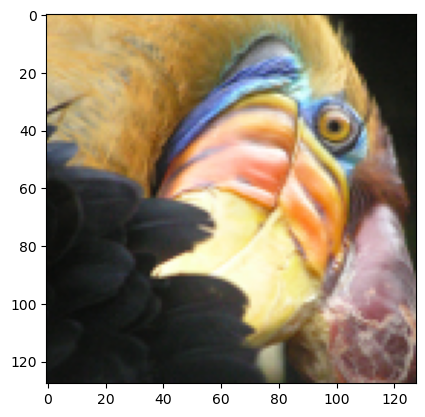

In [16]:
image=io.imread('bird_small.png')
plt.imshow(image)

In [17]:
A=A/255
A=A.reshape(-1,3)

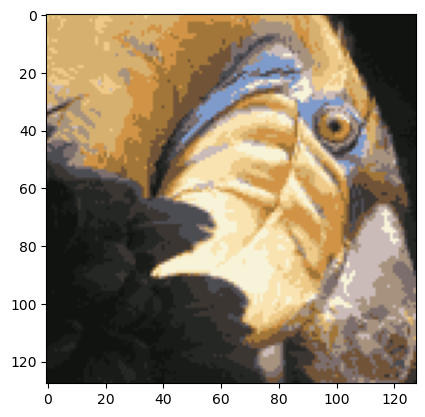

In [18]:
k=16
idx,centros_all=run_kmeans(A,init_centros(A,k=16),iters=20)
centros=centros_all[-1]
im = np.zeros(A.shape)

for i in range(k):
    im[idx==i]=centros[i]
im=im.reshape(128,128,3)
plt.imshow(im)